The code below identifies the resonance valleys and finds the Q - factors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def load_data(file_path):
    # Load your data here
    data = np.loadtxt(file_path, delimiter=',')
    wavelength = data[:, 0]
    transmission = data[:, 1]
    return wavelength, transmission

def find_resonance_valleys(wavelength, transmission, distance=3):
    # Find peaks in the inverted transmission to identify valleys
    peaks, _ = find_peaks(transmission, distance=distance)
    global_max = max(transmission)
    threshold = global_max / 2
    filtered_peaks = [peak for peak in peaks if transmission[peak] >= threshold]
    return filtered_peaks

def calculate_fwhm(wavelength, transmission, valley_index):
    min_transmission = transmission[valley_index]
    half_max = (max(transmission) + min_transmission) / 2

    left_indices = np.where(transmission[:valley_index] < half_max)[0]
    right_indices = np.where(transmission[valley_index:] < half_max)[0]

    if len(left_indices) == 0 or len(right_indices) == 0:
        return None, None

    left_idx = left_indices[-1]
    right_idx = right_indices[0] + valley_index

    fwhm = -wavelength[right_idx] + wavelength[left_idx]
    return fwhm, wavelength[valley_index]

def calculate_q_factors(wavelength, transmission, valleys):
    q_factors = []
    for valley in valleys:
        fwhm, lambda_0 = calculate_fwhm(wavelength, transmission, valley)
        if fwhm is not None and lambda_0 is not None:
            q_factor = lambda_0 / fwhm
            q_factors.append(q_factor)
    return q_factors

def main(file_path):
    wavelength, transmission = load_data(file_path)
    valleys = find_resonance_valleys(wavelength, 1-transmission)
    q_factors = calculate_q_factors(wavelength, 1-transmission, valleys)
    
    for i, q in enumerate(q_factors):
        print(f"Valley {i + 1}: Q-factor = {q}")

    plt.plot(wavelength, transmission, label='Original Data')
    plt.plot(wavelength[valleys], transmission[valleys], 'ro', label='Valleys')
    plt.xlabel('Wavelength')
    plt.ylabel('Transmission')
    plt.legend()
    plt.show()

50nm
Valley 1: Q-factor = 5579.285714287827
Valley 2: Q-factor = 5539.60714285924
Valley 3: Q-factor = 5718.370370369492
Valley 4: Q-factor = 2846.0925925921556


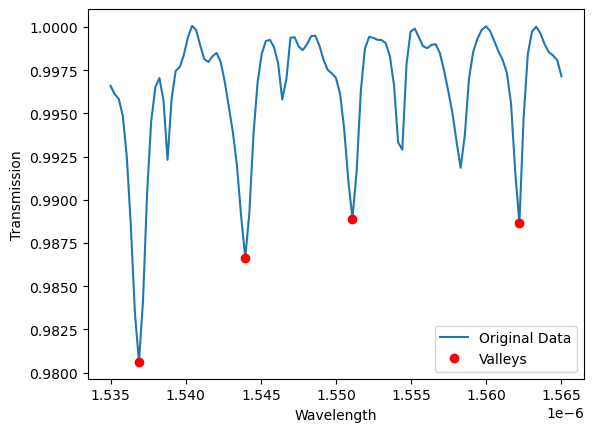

100nm
Valley 1: Q-factor = 2792.1428571428582
Valley 2: Q-factor = 5558.392857140758
Valley 3: Q-factor = 5737.666666665786
Valley 4: Q-factor = 5711.296296295419


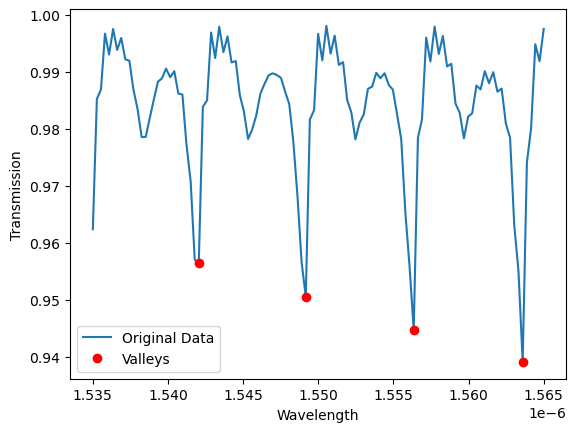

120nm
Valley 1: Q-factor = 2792.1428571428582
Valley 2: Q-factor = 5570.321428573538
Valley 3: Q-factor = 5558.392857140758
Valley 4: Q-factor = 5544.53571428362
Valley 5: Q-factor = 5531.750000002095
Valley 6: Q-factor = 5710.296296299898
Valley 7: Q-factor = 5698.222222225817


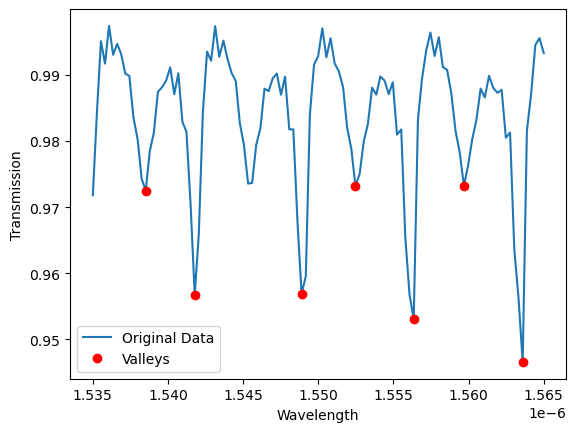

150nm
Valley 1: Q-factor = 5583.285714287828
Valley 2: Q-factor = 5777.666666665779
Valley 3: Q-factor = 5557.392857144961
Valley 4: Q-factor = 5545.535714287815
Valley 5: Q-factor = 5531.750000002095
Valley 6: Q-factor = 5724.444444448055
Valley 7: Q-factor = 2855.1481481488295
Valley 8: Q-factor = 5698.222222225817


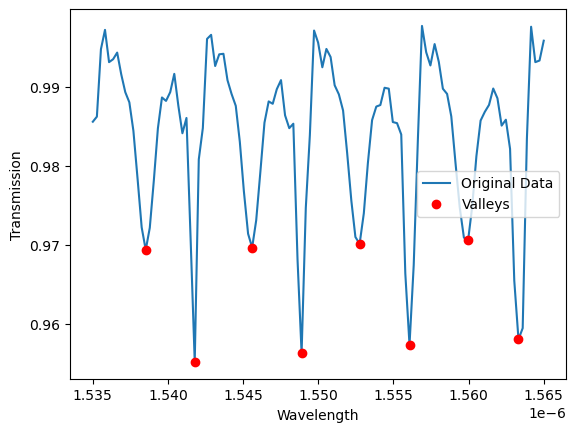

10 deg
Valley 1: Q-factor = 2792.1428571428582
Valley 2: Q-factor = 5558.392857140758
Valley 3: Q-factor = 5737.666666665786
Valley 4: Q-factor = 5711.296296295419


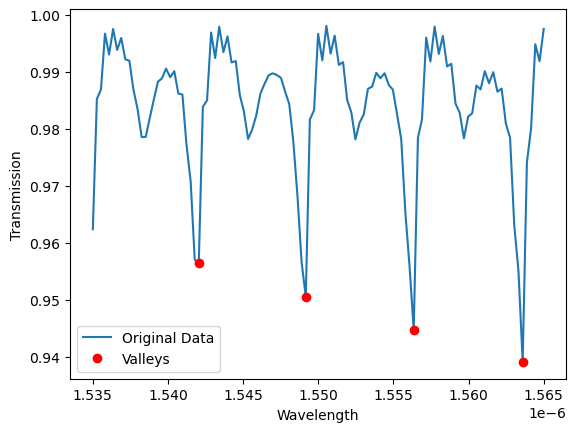

15 deg
Valley 1: Q-factor = 1398.9421487603968
Valley 2: Q-factor = 1415.386554621818
Valley 3: Q-factor = 1420.3220338983513
Valley 4: Q-factor = 1425.4102564101233
Valley 5: Q-factor = 1430.6551724137378
Valley 6: Q-factor = 1436.0608695652418
Valley 7: Q-factor = 1441.6315789472064
Valley 8: Q-factor = 1447.3716814158477
Valley 9: Q-factor = 1466.378378378464
Valley 10: Q-factor = 1472.636363636253
Valley 11: Q-factor = 1479.073394495388
Valley 12: Q-factor = 1472.0642201834614
Valley 13: Q-factor = 1478.6944444445073
Valley 14: Q-factor = 746.2441314553504
Valley 15: Q-factor = 1492.5283018867399
Valley 16: Q-factor = 1499.7428571425933
Valley 17: Q-factor = 1507.1538461539785
Valley 18: Q-factor = 1529.637254901973
Valley 19: Q-factor = 1537.70297029714


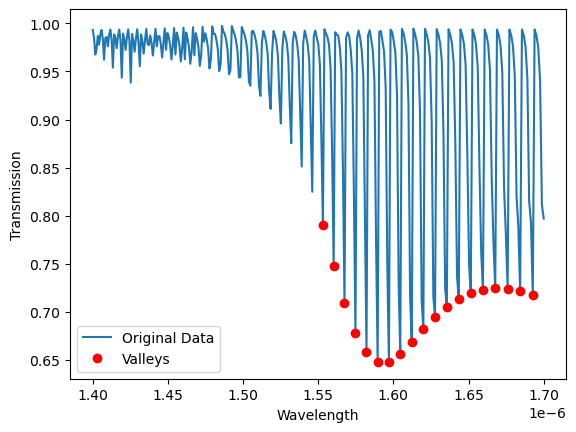

20 deg
Valley 1: Q-factor = 15598.999999998829
Valley 2: Q-factor = 15528.199999998833
Valley 3: Q-factor = 7728.49999999942
Valley 4: Q-factor = 15386.499999998845


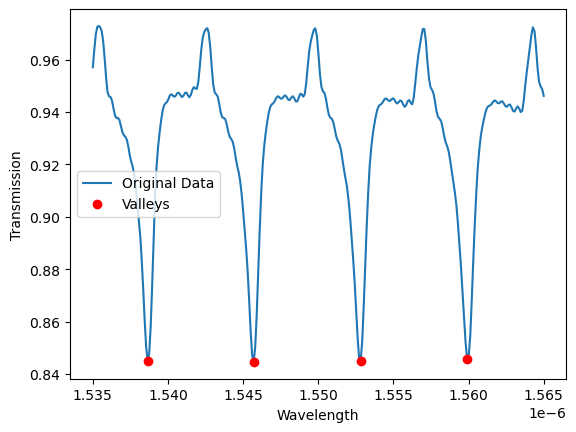

rad 40 um angle 20 deg T
Valley 1: Q-factor = 15614.299999998826
Valley 2: Q-factor = 15560.49999999883
Valley 3: Q-factor = 15507.100000031674
Valley 4: Q-factor = 15453.99999999884
Valley 5: Q-factor = 8105.94736841412


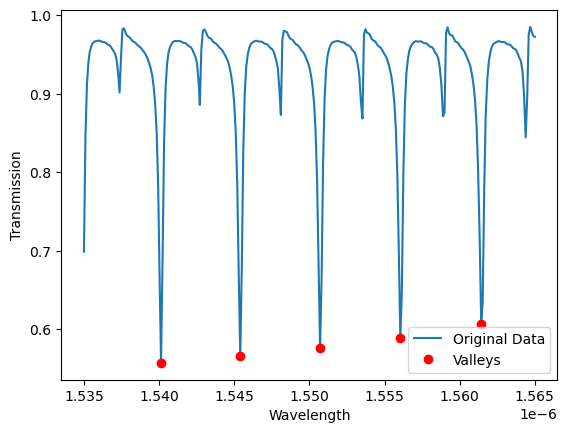

rad 40 um angle 15 deg T
Valley 1: Q-factor = 707.6624472573877
Valley 2: Q-factor = 1416.31355932208
Valley 3: Q-factor = 1444.6403508772992
Valley 4: Q-factor = 1439.6403508772987
Valley 5: Q-factor = 1479.073394495388
Valley 6: Q-factor = 1474.0642201834614
Valley 7: Q-factor = 1503.733333333372
Valley 8: Q-factor = 1498.7428571428957
Valley 9: Q-factor = 1531.6831683169414
Valley 10: Q-factor = 1541.9700000002108
Valley 11: Q-factor = 1552.5050505050335
Valley 12: Q-factor = 1553.2448979592684
Valley 13: Q-factor = 1558.2577319586117


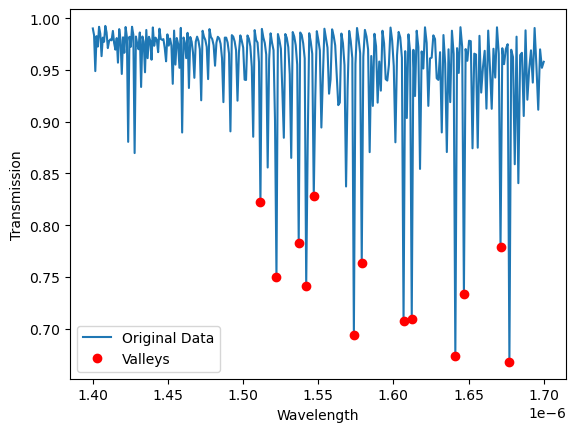

rad 50 um angle 20 deg T
Valley 1: Q-factor = 7808.149999999413
Valley 2: Q-factor = 14156.909090927105
Valley 3: Q-factor = 15529.199999998833
Valley 4: Q-factor = 15485.999999998838
Valley 5: Q-factor = 15444.09999999884
Valley 6: Q-factor = 15401.299999998844
Valley 7: Q-factor = 17065.444444415054


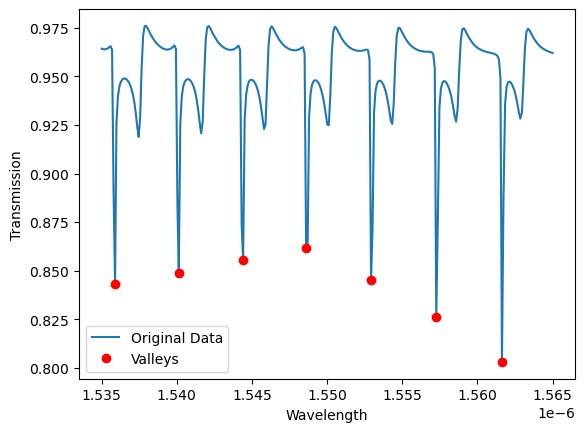

rad 60 um angle 15 deg T
Valley 1: Q-factor = 1424.6724137930485
Valley 2: Q-factor = 1442.6315789474745
Valley 3: Q-factor = 1549.2653061225335
Valley 4: Q-factor = 1574.0105263158466
Valley 5: Q-factor = 1639.2840909092045
Valley 6: Q-factor = 842.8023952096137


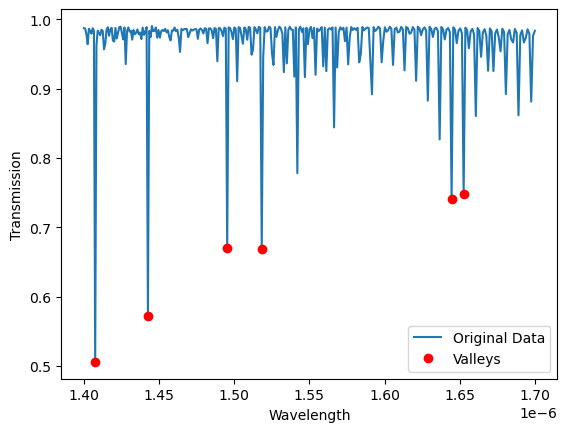

In [2]:
print("50nm")
main('gap 50nm T.txt')
print("100nm")
main('gap 100nm T.txt')
print("120nm")
main('gap 120nm T.txt')
print("150nm")
main('gap 150nm T.txt')

print("10 deg")
main('gap 100nm T.txt')
print("15 deg")
main('angle 15 deg T.txt')
print("20 deg")
main('angle 20 deg T.txt')

print("rad 40 um angle 20 deg T")
main('rad 40 um angle 20 deg T.txt')
print("rad 40 um angle 15 deg T")
main('rad 40 um angle 15 deg T.txt')
print("rad 50 um angle 20 deg T")
main('rad 50 um angle 20 deg T.txt')
print("rad 60 um angle 15 deg T")
main('rad 60 um angle 15 deg T.txt')